<h2 style='text-align:center;font-family: Georgia;font-size:35px;background-color:MAROON;border:20px;color:white'>STUDY LONGER SCORE HIGHER</h2>

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

<a id="top"></a>
<h2 style='text-align:center;font-family: Georgia;font-size:35px;background-color:MAROON;border:20px;color:white'>TABLE OF CONTENTS</h2>

* [IMPORTING RELEVANT LIBRARIES](#1)
* [DATA INSPECTION](#2)
* [EXPLORATIVE DATA ANALYSIS](#3)
* [MODEL BUILDING](#4)
* [MODEL EVALUATION](#5)

<a id="1"></a>
<h2 style='text-align:center;font-family: Georgia;font-size:30px;background-color:MAROON;border:20px;color:white'>IMPORTING RELEVANT LIBRARIES</h2>

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

<a id="2"></a>
<h2 style='text-align:center;font-family: Georgia;font-size:30px;background-color:MAROON;border:20px;color:white'>DATA INSPECTION</h2>

In [4]:
# Read the dataset
score = pd.read_csv("student_scores - student_scores.csv")

In [5]:
# Let's see what features do we have
score.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
# Let's see how many rows and columns we have

print(score.shape)
print()
print("Rows:",score.shape[0])
print()
print("Columns:",score.shape[1])

(25, 2)

Rows: 25

Columns: 2


In [7]:
# Let's fetch some more information

score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
score.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [9]:
print("Average Score:",score['Scores'].mean())
print("Average Study Hours:",score['Hours'].mean())

Average Score: 51.48
Average Study Hours: 5.012


In [10]:
# Let's check if we have any missing values

score.isnull().sum()

Hours     0
Scores    0
dtype: int64

We don't have any missing values to deal with!

<a id="3"></a>
<h2 style='text-align:center;font-family: Georgia;font-size:30px;background-color:MAROON;border:20px;color:white'>EXPLORATIVE DATA ANALYSIS</h2>

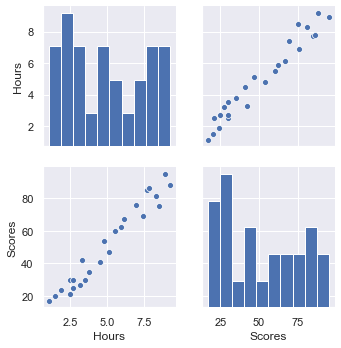

In [11]:
sns.pairplot(score)

We see that there's a linear relation between the hours of study and scores.

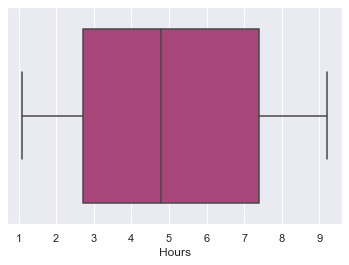

In [12]:
sns.boxplot('Hours',data=score,palette='magma')

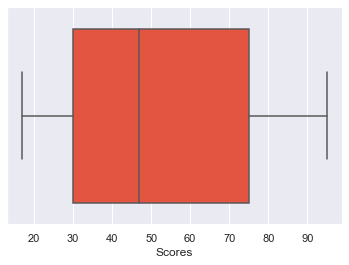

In [13]:
sns.boxplot('Scores',data=score,palette='CMRmap')

<a id="4"></a>
<h2 style='text-align:center;font-family: Georgia;font-size:30px;background-color:MAROON;border:20px;color:white'>MODEL BUILDING</h2>

Equation of linear regression:
    
𝑦=𝑐+𝑚1𝑥1+𝑚2𝑥2+...+𝑚𝑛𝑥𝑛 

𝑦  is the response
𝑐  is the intercept
𝑚1  is the coefficient for the first feature
𝑚𝑛  is the coefficient for the nth feature

In our case:

**y= X*hours+c**

In [14]:
X = score.drop('Scores',1)
y = score['Scores']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

for k in range(2,6):

    kfold = KFold(n_splits=k, random_state=0)
    model_kfold = LinearRegression()
    results_kfold = -1 * cross_val_score(model_kfold, X, y, cv=kfold,scoring='neg_mean_squared_error')
    print("MSE:",results_kfold.mean())

MSE: 54.303963630920606
MSE: 42.696140733024606
MSE: 41.344306934029696
MSE: 38.47094442979678


In [17]:
X_train.shape , X_test.shape

((17, 1), (8, 1))

In [18]:
reg = LinearRegression()

In [19]:
reg.fit(X_train,y_train)

LinearRegression()

In [20]:
train_acc = reg.score(X_train,y_train)
print("Training Accuracy:",train_acc*100)

test_acc = reg.score(X_test,y_test)
print("Testing Accuracy:",test_acc*100)

Training Accuracy: 94.84997422695115
Testing Accuracy: 95.68211104435257


In [21]:
m = reg.coef_
print("Coefficient value:",m[0])

Coefficient value: 9.788566686749046


In [22]:
c= reg.intercept_
print("Intercept value:",round(c,2))

Intercept value: 2.37


<a id="5"></a>
<h2 style='text-align:center;font-family: Georgia;font-size:30px;background-color:MAROON;border:20px;color:white'>MODEL EVALUATION</h2>

In [24]:
y_pred = reg.predict(X_test)

In [26]:
r_squared = r2_score(y_test, y_pred)
r_squared*100

95.68211104435257

In [27]:
#Returns the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:",mse)

Mean Squared Error: 22.96509721270043


In [28]:
#Returns the mean squared error; we'll take a square root
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:",rmse)

Root Mean Squared Error: 4.792191274636315


In [29]:
y_train_pred = reg.predict(X_train)

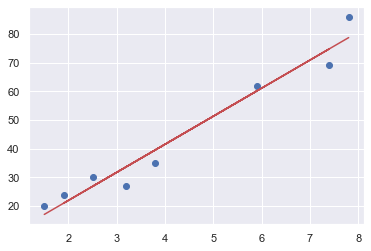

In [30]:
plt.scatter(X_test, y_test)
plt.plot(X_test, c + m * X_test, 'r')
plt.show()

In [31]:
y_train_pred = reg.predict(X_train)
res = (y_train - y_train_pred)

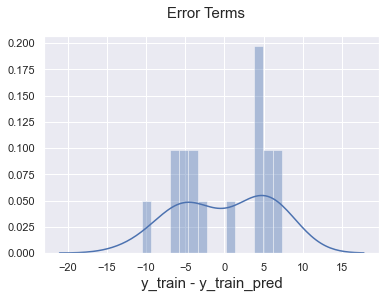

In [32]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

In [33]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
5,20,17.053665
2,27,33.694229
19,69,74.806209
16,30,26.842232
11,62,60.123359
22,35,39.567369
17,24,20.969092
24,86,78.721636


In [36]:
print("Scores(y) = {0}*Hours + {1}".format(m[0],c))

Scores(y) = 9.788566686749046*Hours + 2.370815382341881


In [35]:
hours = 9.25
to_pred = reg.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(to_pred[0]))

No of Hours = 9.25
Predicted Score = 92.91505723477056


So a student studying for **9.25** hours can score **93%**!

<img src ="https://thebritishschoolofetiquette.com/wp-content/uploads/2018/12/Article-Size-Pictures7.jpg">